## SYDE556/750 Assignment 1: Representation in Populations of Neurons

- Due Date: January 28th at midnight
- Total marks: 20 (20% of final grade)
- Late penalty: 1 mark per day
- It is recommended that you use Python.
- *Do not use or refer to any code from Nengo*

## 1) Representation of Scalars

### 1.1) Basic encoding and decoding

Write a program that implements a neural representation of a scalar value $x$.  For the neuron model, use a rectified linear neuron model ($a=max(J,0)$).  Choose the maximum firing rates randomly (uniformly distributed between 100Hz and 200Hz at x=1), and choose the x-intercepts randomly (uniformly distributed between -0.95 and 0.95).  Use those values to compute the corresponding $\alpha$ and $J^{bias}$ parameters for each neuron.  The encoders $e$ are randomly chosen and are either +1 or -1 for each neuron.  Go through the following steps:




In [26]:
"import libraries"
import numpy
import matplotlib.pyplot as plt
import random
import math

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Plot the neuron responses $a_i$ for 16 randomly generated neurons. (See Figure 2.4 in the book for an example, but with a different neuron model and a different range of maximum firing rates).  
<ul><li>Since you can't compute this for every possible $x$ value between -1 and 1, sample the x-axis with $dx=0.05$.  Use this sampling throughout this question)</li></ul>
</li>
</ol>

In [27]:
"""My Functions"""
#Generates Rectified Linear Neuron
def RectifiedLinear(x,gain,bias):   #Recitified linear neuron
    J=gain*x+bias
    a=J
    for i in range(len(a)):
        if a[i]<0:
            a[i]=0;
    return a  

# Report the Root Mean Squared Error value
def rmse(predictions, targets):
    return numpy.sqrt(((predictions - targets) ** 2).mean())

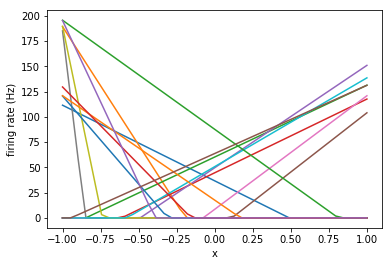

In [28]:
N=16
dx=0.05
x_range=[-1,1]
S=int((x_range[1]-x_range[0])/dx)
x = numpy.linspace(x_range[0],x_range[1],S)
A=numpy.zeros((N,S))

xIntercept=numpy.array([random.uniform(-0.95,0.95) for i in range(N)])
frMax=numpy.array([random.uniform(100,200) for i in range(N)])
for i in range(N):
    e=random.choice([-1,1])
    gain=frMax[i]/(1-xIntercept[i])
    bias=-xIntercept[i]*gain
    A[i]=RectifiedLinear(x*e,gain=gain,bias=bias)
    plt.plot(x,A[i])
    plt.xlabel('x')
    plt.ylabel('firing rate (Hz)')

<ol style="list-style:lower-alpha outside none;" start="2">
 <li> [1 mark] Compute the optimal decoders $d_i$ for those 16 neurons (as shown in class).  Report their values.
<ul><li>The easiest way to compute $d$ is to use the matrix notation mentioned in the course notes.  $A$ is the matrix of neuron activities (the same thing used to generate the plot in 1.1a).
</li></ul>
</li>
</ol>

In [29]:
Gamma=numpy.dot(A,A.T)/S
Upsilon=numpy.dot(A,x)/S
d=numpy.dot(numpy.linalg.inv(Gamma),Upsilon)
print('Decoder Matrix: ',d)

Decoder Matrix:  [ 9.94297037e-04  3.65977638e-03  2.49516389e-03  2.88269977e-03
  1.90060624e-03  3.65994571e-03  2.87653700e-03 -7.13427282e-05
 -1.13831710e-04 -2.96125082e-03 -9.07973013e-05 -4.17274990e-03
 -9.47382462e-04 -7.60116727e-03 -4.38283370e-04 -2.12429254e-03]


<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] Compute and plot $\hat{x}=\sum_i d_i a_i$.  Overlay on the plot the line $y=x$.  (See Figure 2.7 for an example).  Make a separate plot of $x-\hat{x}$ to see what the error looks like.  Report the Root Mean Squared Error value.
</li>
</ol>

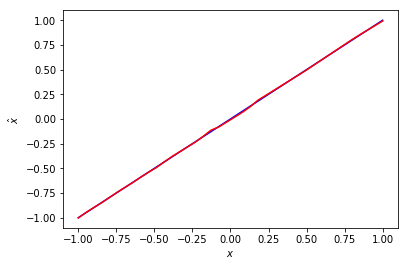

RMSE:  0.004849499364924621


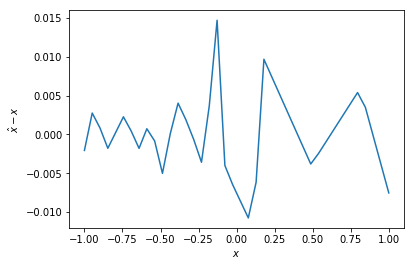

In [30]:
xhat=numpy.dot(A.T,d)  #Calculating x_hat

plt.show()
plt.plot(x,x,'b')       #plot the line y=x
plt.plot(x,xhat,'r')   #plot the x vs. x_hat
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')

plt.show()
plt.plot(x,xhat-x)  #plot for x_hat-x
plt.xlabel('$x$')
plt.ylabel('$\hat{x}-x$')

rmse_val_c = rmse(x,xhat)
print('RMSE: ' ,rmse_val_c)

<ol style="list-style:lower-alpha outside none;" start="4">
<li> [1 mark] Now try decoding under noise.  Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean 0 and standard deviation of 0.2 times the maximum firing rate of all the neurons.  Resample this variable for every different $x$ value for every different neuron.  Create all the same plots as in part c).  Report the Root Mean Squared Error value.
</li>
</ol>

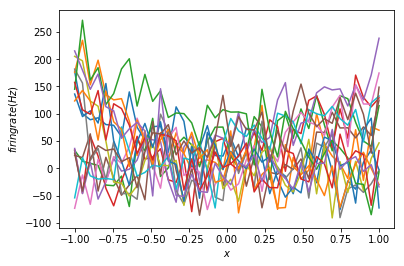

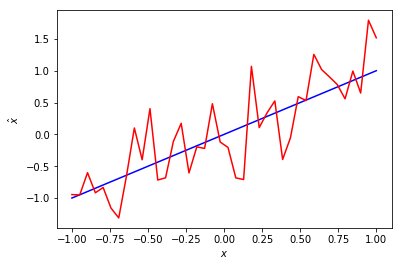

RMSE:  0.43641565447925446


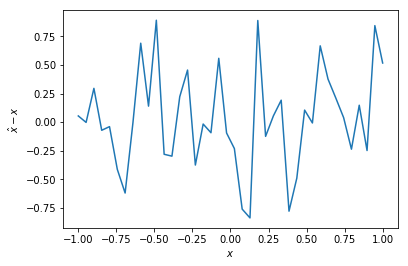

In [31]:
A_noisy=A+numpy.random.normal(scale=0.2*numpy.max(A),size=A.shape)
for i in range(N):
    plt.plot(x,A_noisy[i])
    plt.xlabel('$x$')
    plt.ylabel('$firing rate (Hz)$')
    
xhat=numpy.dot(A_noisy.T,d)  #Calculating x_hat

plt.show()
plt.plot(x,x,'b')       #plot the line y=x
plt.plot(x,xhat,'r')   #plot the x vs. x_hat
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')

plt.show()
plt.plot(x,xhat-x)  #plot for x_hat-x
plt.xlabel('$x$')
plt.ylabel('$\hat{x}-x$')

rmse_val_d = rmse(x,xhat)
print('RMSE: ' ,rmse_val_d)    


<ol style="list-style:lower-alpha outside none;" start="5">
<li>[1 mark] Recompute the decoders $d_i$ taking noise into account (as shown in class).  Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in c) and d).  Report the RMSE for both cases.
<ul><li>As in the previous question, $\sigma$ is 0.2 times the maximum firing rate of all the neurons.
</li></ul>
</li>
</ol>

In [32]:
Gamma=numpy.dot(A,A.T)/S+(0.2*numpy.max(A))**2*numpy.identity(N)
Upsilon=numpy.dot(A,x)/S
d_noisy=numpy.dot(numpy.linalg.inv(Gamma),Upsilon)
print('Decoder Matrix: ',d_noisy)

Decoder Matrix:  [-9.84015180e-04 -7.59979437e-04  7.95410155e-04  8.56426982e-04
  1.19579050e-03  9.67659470e-04  1.13004481e-03 -7.92529527e-05
 -1.60766899e-04  1.03445147e-03 -3.76802488e-04 -8.37898989e-04
 -1.91249442e-03 -5.61031070e-04 -4.99808403e-04  7.30277448e-04]


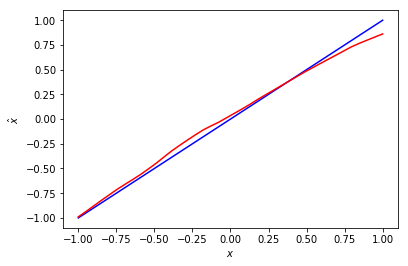

RMSE:  0.05176373921605015


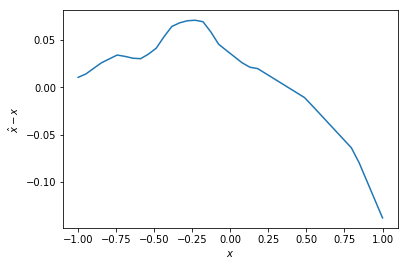

In [33]:
#Decoding the case without noise added to a
xhat=numpy.dot(A.T,d_noisy)

plt.show()
plt.plot(x,x,'b')       #plot the line y=x
plt.plot(x,xhat,'r')   #plot the x vs. x_hat
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')

plt.show()
plt.plot(x,xhat-x)  #plot for x_hat-x
plt.xlabel('$x$')
plt.ylabel('$\hat{x}-x$')

rmse_val_e1 = rmse(x,xhat)
print('RMSE: ' ,rmse_val_e1)

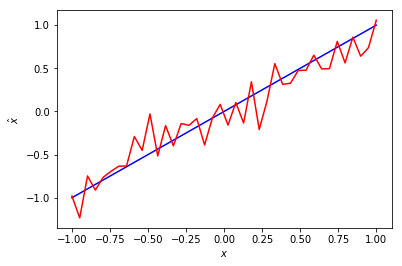

RMSE:  0.1768356208917127


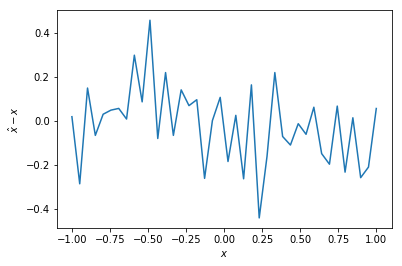

In [34]:
#Decoding signals with noise added to a
xhat=numpy.dot(A_noisy.T,d_noisy)

plt.show()
plt.plot(x,x,'b')       #plot the line y=x
plt.plot(x,xhat,'r')   #plot the x vs. x_hat
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')

plt.show()
plt.plot(x,xhat-x)  #plot for x_hat-x
plt.xlabel('$x$')
plt.ylabel('$\hat{x}-x$')
rmse_val_e2 = rmse(x,xhat)
print('RMSE: ' ,rmse_val_e2)

<ol style="list-style:lower-alpha outside none;" start="6">
<li> [1 mark] Show a 2x2 table of the four RMSE values reported in parts c), d), and e).  This should show the effects of adding noise and whether or not the decoders $d$ are computed taking noise into account.  Write a few sentences commenting on what the table shows.
</li>
</ol>

In [35]:
RMSE=numpy.array([[rmse_val_c, rmse_val_d],[rmse_val_e1, rmse_val_e2]])
print(RMSE)

[[0.0048495  0.43641565]
 [0.05176374 0.17683562]]


#### My Comments on what the RMSE table shows 
>In noisy environment, the optimal decoder whose elements have been derived by taking noise into account results in estimating represented value better than the decoder where the presence of the noise has been ignored (Camparing RMSE(1,2) & RMSE(2,2)).
However; when neurons' behaviours are not noisy, the decoder calculated without taking noise into account has better performance (Camparing RMSE(1,2) & RMSE(2,2)). 


### 1.2) Exploring sources of error

Use the program you wrote in 1.1 to examine the sources of error in the representation.

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[2 marks] Plot the error due to distortion $E_{dist}$ and the error due to noise $E_{noise}$ as a function of $N$, the number of neurons. Use the equation with those two parts as your method (2.9 in the book). Generate two different loglog plots (one for each type of error) with $N$ values of [4, 8, 16, 32, 64, 128, 256, 512] (and more, if you would like).  For each $N$ value, do at least 5 runs and average the results.  For each run, different $\alpha$, $J^{bias}$, and $e$ values should be generated for each neuron.  Compute $d$ under noise, with $\sigma$ equal to 0.1 times the maximum firing rate.  Show visually that the errors are proportional to $1/N$ or $1/N^2$ (see figure 2.6 in the book).
</li>
</ol>

Text(0, 0.5, '$E_{noise}$  &  $E_{distortion} $')

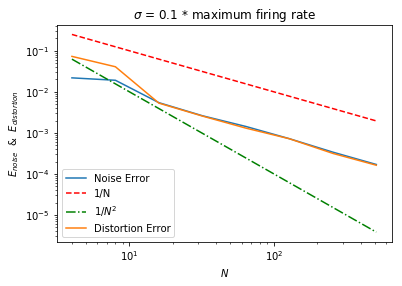

In [36]:
N=numpy.array([4,8,16,32,64,128,256,512])

noiseErrorAll=numpy.zeros([1,N.size])
distortionErrorAll=numpy.zeros([1,N.size])
for i in range(N.size):
    S=40; 
    x = numpy.linspace(-1,1,S)
    A = numpy.zeros([N[i],S])
    
    trialNo=5
    noiseError=numpy.zeros([1,trialNo])
    distortionError=numpy.zeros([1,trialNo])
    for j in range(trialNo):
        xIntercept=numpy.array([random.uniform(-0.95,0.95) for x in range(N[i])])
        frMax=numpy.array([random.uniform(100,200) for f in range(N[i])])
        for k in range(N[i]):
            e=random.choice([-1,1])
            gain=frMax[k]/(1-xIntercept[k])
            bias=-xIntercept[k]*gain
            A[k]=RectifiedLinear(x*e,gain=gain,bias=bias)
                          
        sigma=0.1*A.max()
        A_noisy=A+numpy.random.normal(scale=sigma,size=A.shape)
        Gamma=numpy.dot(A,A.T)/S+sigma**2*numpy.identity(N[i])
        Upsilon=numpy.dot(A,x)/S
        d_noisy=numpy.dot(numpy.linalg.inv(Gamma),Upsilon)
        xhat=numpy.dot(A_noisy.T,d_noisy)
        
        noiseError[0,j]=sigma**2*(d_noisy**2).sum()
        distortionError[0,j]=((x-xhat)**2).sum()/S
   
    noiseErrorAll[0,i]=numpy.mean(noiseError)
    distortionErrorAll[0,i]=numpy.mean(distortionError)
    
    
#ploting Error due to Noise
plt.title('$\sigma$ = 0.1 * maximum firing rate')
plt.loglog(N,noiseErrorAll.reshape(N.size,1),label='Noise Error')
plt.loglog(N,1/N,'r--', label='1/N') 
plt.loglog(N,1/N**2,'g-.', label="1/$N^2$")  
plt.xlabel('$N$')
plt.legend()

#ploting Error due to Distortion
plt.loglog(N,distortionErrorAll.reshape(N.size,1),label='Distortion Error')
plt.legend()
plt.ylabel('$E_{noise}$  &  $E_{distortion} $')

<ol style="list-style:lower-alpha outside none;" start="2">
<li>[1 mark] Repeat part a) with $\sigma$ equal to 0.01 times the maximum firing rate.
</li>
</ol>

Text(0, 0.5, '$E_{noise}$  &  $E_{distortion} $')

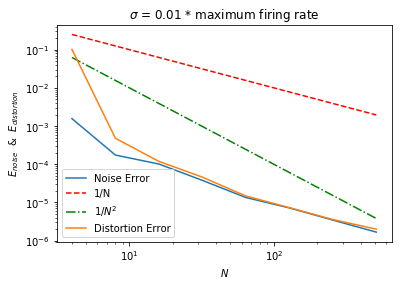

In [37]:
N=numpy.array([4,8,16,32,64,128,256,512])

noiseErrorAll=numpy.zeros([1,N.size])
distortionErrorAll=numpy.zeros([1,N.size])
for i in range(N.size):
    S=40; 
    x = numpy.linspace(-1,1,S)
    A = numpy.zeros([N[i],S])
    
    trialNo=5
    noiseError=numpy.zeros([1,trialNo])
    distortionError=numpy.zeros([1,trialNo])
    for j in range(trialNo):
        xIntercept=numpy.array([random.uniform(-0.95,0.95) for x in range(N[i])])
        frMax=numpy.array([random.uniform(100,200) for f in range(N[i])])
        for k in range(N[i]):
            e=random.choice([-1,1])
            gain=frMax[k]/(1-xIntercept[k])
            bias=-xIntercept[k]*gain
            A[k]=RectifiedLinear(x*e,gain=gain,bias=bias)
                          
        A_noisy=A+numpy.random.normal(scale=sigma,size=A.shape)
        
        sigma=0.01*A.max()
        Gamma=numpy.dot(A,A.T)/S+sigma**2*numpy.identity(N[i])
        Upsilon=numpy.dot(A,x)/S
        d_noisy=numpy.dot(numpy.linalg.inv(Gamma),Upsilon)
        xhat=numpy.dot(A_noisy.T,d_noisy)
        
        noiseError[0,j]=sigma**2*(d_noisy**2).sum()
        distortionError[0,j]=((x-xhat)**2).sum()/S
   
    noiseErrorAll[0,i]=numpy.mean(noiseError)
    distortionErrorAll[0,i]=numpy.mean(distortionError)
    
    
#ploting Error due to Noise
plt.title('$\sigma$ = 0.01 * maximum firing rate')
plt.loglog(N,noiseErrorAll.reshape(N.size,1),label='Noise Error')
plt.loglog(N,1/N,'r--', label='1/N') 
plt.loglog(N,1/N**2,'g-.', label="1/$N^2$")  
plt.xlabel('$N$')
plt.legend()

#ploting Error due to Distortion
plt.loglog(N,distortionErrorAll.reshape(N.size,1),label='Distortion Error')
plt.legend()
plt.ylabel('$E_{noise}$  &  $E_{distortion} $')

<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?
</li>
</ol>

> The comparison between the graphs in a) and b) show that as the amount of noise decreases not only does the decoding errer due to 
the presense of noise decrease but the error due to decoder weight estimation decreases as well. 
However, in both cases the share of two sources are error in total error are the same especially for larger neuron populations 

### 1.3) Leaky Integrate-and-Fire neurons

Change the code to use the LIF neuron model: 

$$
a_i = \begin{cases}
    {1 \over {\tau_{ref}-\tau_{RC}ln(1-{1 \over J})}} &\mbox{if } J>1 \\ 
    0 &\mbox{otherwise} 
    \end{cases}
$$


<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Generate the same plot as 1.1a).  Use $\tau_{ref}=0.002$s and $\tau_{RC}=0.02$s.
<ul><li>Note that you will need to compute new $\alpha$ and $J^{bias}$ values that will achieve the desired tuning curves (uniform distribution of x-intercepts between -1 and 1, and maximum firing rates between 100Hz and 200Hz).  Since you know two points on the tuning curve (the x-intercept and the point where it hits maximum firing), this gives you 2 equations and 2 unknowns, so you can find $\alpha$ and $J^{bias}$ by substituting and rearranging.
</li></ul>
</li>
</ol>

In [38]:
#Generates Rectified Linear Neuron
def LIF(x,gain,bias,tau_rc=0.02,tau_ref=0.002):   #Recitified linear neuron
    J=gain*x+bias
    a=numpy.zeros([1,J.size])
    for i in range(J.size):
        a[0,i]=1/(tau_ref-tau_rc*math.log(1-1/J[i])) if (J[i]>1) else 0
    return a  

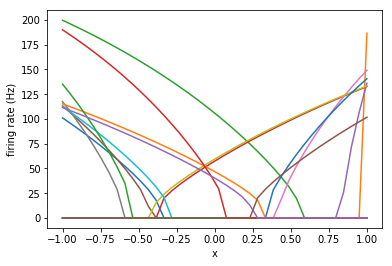

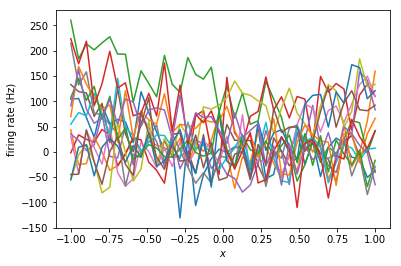

In [39]:
N=16
S=40
x = numpy.linspace(-1,1,S)
A=numpy.zeros((N,S))

xIntercept=numpy.array([random.uniform(-1,1) for i in range(N)])
frMax=numpy.array([random.uniform(100,200) for i in range(N)])
for i in range(N):
    e=random.choice([-1,1])
    tau_rc=0.02
    tau_ref=0.002
    gain=(1/(1-xIntercept[i]))*(1/(1-numpy.e**((frMax[i]*tau_ref-1)/(frMax[i]*tau_rc))))
    bias=-xIntercept[i]*gain
    A[i]=LIF(x*e,gain=gain,bias=bias)
    plt.plot(x,A[i])
    plt.xlabel('x')
    plt.ylabel('firing rate (Hz)')

A_noisy=A+numpy.random.normal(scale=0.2*numpy.max(A),size=A.shape)
plt.show()
for i in range(N):
    plt.plot(x,A_noisy[i])
    plt.xlabel('$x$')
    plt.ylabel('firing rate (Hz)')

<ol style="list-style:lower-alpha outside none;" start="2">
<li> [2 marks] Generate the same plots as 1.1e), and report the RMSE for both.
</li>
</ol>

In [40]:
Gamma=numpy.dot(A,A.T)/S+(0.2*numpy.max(A))**2*numpy.identity(N)
Upsilon=numpy.dot(A,x)/S
d_noisy=numpy.dot(numpy.linalg.inv(Gamma),Upsilon)
print('Decoder Matrix: ',d_noisy)

Decoder Matrix:  [-0.00052026  0.00017431 -0.00095229  0.00165368  0.00038885 -0.00056848
  0.00108097 -0.00051599  0.00166402 -0.00059951  0.0011242  -0.0006895
 -0.00063001 -0.00123463 -0.00069643  0.00092865]


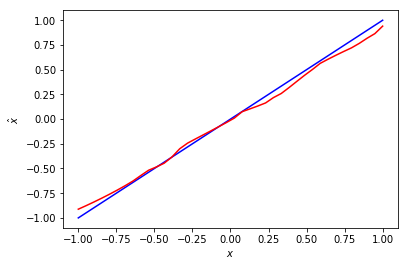

RMSE:  0.04759126823164126


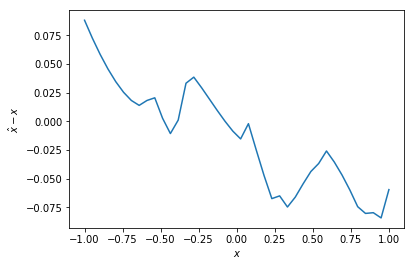

In [41]:
#Decoding the case without noise added to a
xhat=numpy.dot(A.T,d_noisy)

plt.show()
plt.plot(x,x,'b')       #plot the line y=x
plt.plot(x,xhat,'r')   #plot the x vs. x_hat
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')

plt.show()
plt.plot(x,xhat-x)  #plot for x_hat-x
plt.xlabel('$x$')
plt.ylabel('$\hat{x}-x$')

rmse_val_e1 = rmse(x,xhat)
print('RMSE: ' ,rmse_val_e1)

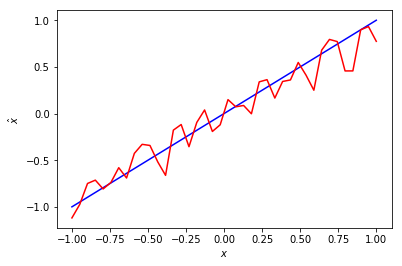

RMSE:  0.15306745153545684


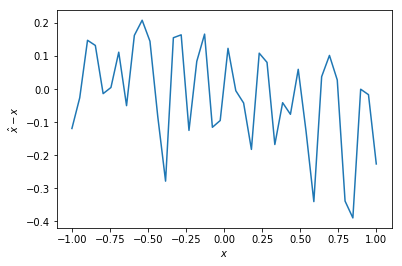

In [42]:
#Decoding signals with noise added to a
xhat=numpy.dot(A_noisy.T,d_noisy)

plt.show()
plt.plot(x,x,'b')       #plot the line y=x
plt.plot(x,xhat,'r')   #plot the x vs. x_hat
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')

plt.show()
plt.plot(x,xhat-x)  #plot for x_hat-x
plt.xlabel('$x$')
plt.ylabel('$\hat{x}-x$')
rmse_val_e2 = rmse(x,xhat)
print('RMSE: ' ,rmse_val_e2)

## 2) Representation of Vectors

### 2.1) Vector tuning curves

<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an x-intercept at the origin (0,0), and has a maximum firing rate of 100Hz.

<ul><li> Remember that $J=\alpha e \cdot x + J^{bias}$, and both $x$ and $e$ are 2D vectors.</li>
<li> This is a 3D plot similar to figure 2.8a in the book.</li>
<li> In the scalar case (that you did in question 1.1a), the maximum firing rate occurred when $x=1$ for neurons with $e=1$ and at $x=-1$ for neurons with $e=-1$.  Of course, if the graph in 1.1a was extended to $x>1$ (or $x<-1$), neurons would start firing faster than their maximum firing rate.  Similarly, here the "maximum firing rate" means the firing rate when $x=e$.  This should allow you to reuse your code from 1.3a) to compute $\alpha$ and $J^{bias}$ for a desired maximum firing rate and x-intercept.</li>
<li> To generate 3D plots in MATLAB, see [here](http://www.mathworks.com/help/matlab/learn_matlab/creating-mesh-and-surface-plots.html)</li>
<li> To generate 3D plots in Python, see [here](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)</li>
</ul>
</li>
</ol>

In [43]:
def LIF2D(x,gain,bias,tau_rc=0.02,tau_ref=0.002):   #Recitified linear neuron
    import math
    import numpy
    J=gain*x+bias
    a=numpy.zeros([J.shape[0],J.shape[0]])
    for i in range(J.shape[0]):
        for j in range(J.shape[0]):
            a[i,j]=1/(tau_ref-tau_rc*math.log(1-1/J[i,j])) if J[i,j]>1 else 0
    return a  

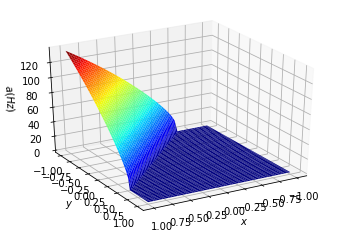

In [44]:
e = numpy.array([1.0, -1.0]) 

a = numpy.linspace(-1,1,50)
b = numpy.linspace(-1,1,50)

X,Y = numpy.meshgrid(a, b)
xIntercept=numpy.linalg.norm([0,0])

frMax=100
tau_rc=0.02
tau_ref=0.002

gain=(1/(1-xIntercept))*(1/(1-numpy.e**((frMax*tau_ref-1)/(frMax*tau_rc))))
bias=-xIntercept*gain

e = e/numpy.linalg.norm(e)
Z=LIF2D((X*e[0]+Y*e[1]), gain=gain, bias=bias)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')  
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet,
                        linewidth=0, cstride=1, rstride=1)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$a (Hz)$")
ax.view_init(azim=60)

<ol style="list-style:lower-alpha outside none;" start="2">
<li> [1 mark] Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle.  This will be similar to Figure 2.8b in the book.  Fit a curve of the form $Acos(B\theta+C)+D$ to the tuning curve and plot it as well.  What makes a cosine a good choice for this?  Why does it differ from the ideal curve?
<ul><li> To do curve fitting in MATLAB, see [here](http://www.mathworks.com/help/optim/ug/lsqcurvefit.html).</li>
<li> To do curve fitting in Python, see [here](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).</li>
</ul>
</li>
</ol>

[52.04580305  1.20304476 -5.38720306 33.92919749]


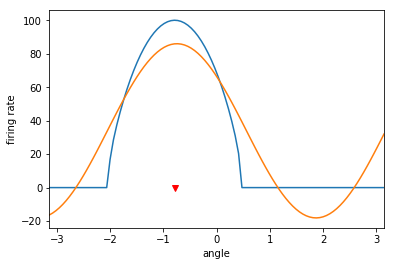

In [45]:
e = numpy.array([1.0, -1.0])
e = e/numpy.linalg.norm(e)

theta = numpy.linspace(-numpy.pi, numpy.pi, 100)
x = numpy.array([numpy.cos(theta), numpy.sin(theta)])

A=numpy.zeros([1,100])
A=LIF(numpy.dot(x.T, e), gain=gain, bias=bias)

plt.show()
plt.plot(theta, A[0])
plt.plot([numpy.arctan2(e[1],e[0])],0,'rv')
plt.xlabel('angle')
plt.ylabel('firing rate')
plt.xlim(-numpy.pi,numpy.pi);

#Curve Fitting
from scipy.optimize import curve_fit

def func(theta, A, B, C, D):
    return A * numpy.cos(B * theta + C) + D

popt, pcov = curve_fit(func, theta, A[0])
print(popt)

plt.plot(theta, func(theta,*popt))


> I think cosine is a good choice for approximating tuning curve because the tuning curve is a function of J(x) which has cosine in its definition;  
$J_{i}(x)=\alpha_{i} e_{i} \cdot x + J_{i}^{bias}=\alpha_{i}|e_{i}||x|cos(\theta)+J_{i}^{bias}$, where $\theta$ the angle between vectors $e_{i}$ and x. 
However; then $J_{i}(x)$ goes through nolinear a function, i.e., $a_{i}(x)=J_{i}(x)$. Thats why cosine function differs from the ideal tuning curve.

### 2.2 Vector representation

<ol style="list-style:lower-alpha outside none;" start="1">
<li> [1 mark] Generate a set of 100 random unit vectors uniformly distributed around the unit circle.  These will be the encoders $e$ for 100 neurons.  Plot these vectors with a quiver or line plot (i.e. not just points, but lines/arrows to the points).
</li>
</ol>

Text(0.5, 1.0, 'Encoder Vector')

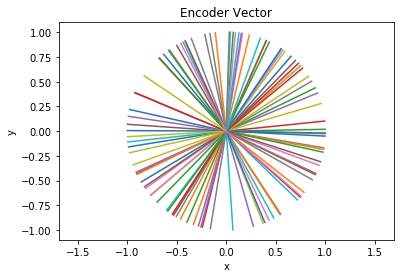

In [46]:
theta=numpy.zeros(100)
for i in range(100):
    theta[i] = numpy.random.uniform(0,2*numpy.pi)

e = numpy.array([numpy.cos(theta), numpy.sin(theta)])

for i in range(100):
    plt.plot([0,e[0,i]],[0,e[1,i]])
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
plt.title("Encoder Vector")

<ol style="list-style:lower-alpha outside none;" start="2">
<li> [1 mark] Compute the optimal decoders.  Use LIF neurons with the same properties as in question 1.3.  When computing the decoders, take into account noise with $\sigma$ as 0.2 times the maximum firing rate.  Plot the decoders.  How do these decoding vectors compare to the encoding vectors?
<ul><li> Note that the decoders will also be 2D vectors.</li>
<li>In the scalar case, you used $x$ values between -1 and 1, with $dx=0.05$.  In this case, you can regularly tile the 2D $x$ values ([1, 1], [1, 0.95], ... [-1, -0.95], [-1, 1]).  Alternatively, you can just randomly choose 1600 different $x$ values to sample. </li>
</li>
</ol>

Text(0, 0.5, 'y')

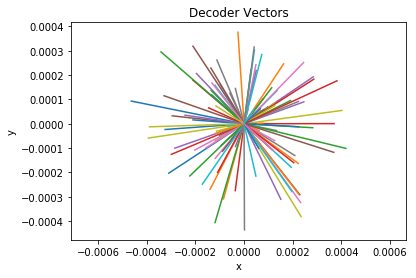

In [47]:
a=numpy.linspace(-1,1,40)
b=x=numpy.linspace(-1,1,40)
X=[]
for i in range(40):
    for j in range(40):
        X.append([a[i],b[j]])
X=numpy.array(X)

A=numpy.zeros([100,1600])

xIntercept=numpy.array([random.uniform(-1,1) for i in range(100)])
frMax=numpy.array([random.uniform(100,200) for i in range(100)])

for i in range(100):
    tau_rc=0.02
    tau_ref=0.002
    gain=(1/(1-xIntercept[i]))*(1/(1-numpy.e**((frMax[i]*tau_ref-1)/(frMax[i]*tau_rc))))
    bias=-xIntercept[i]*gain
    A[i]=LIF(numpy.dot(X,[e[0,i],e[1,i]]),gain=gain,bias=bias)

A_noisy=A+numpy.random.normal(scale=0.2*numpy.max(A),size=A.shape)  

Gamma=numpy.dot(A,A.T)/1600+(0.2*numpy.max(A))**2*numpy.identity(100)
Upsilon_x=numpy.dot(A,X[:,0])/1600
Upsilon_y=numpy.dot(A,X[:,1])/1600
d_noisy_x=numpy.dot(numpy.linalg.inv(Gamma),Upsilon_x)
d_noisy_y=numpy.dot(numpy.linalg.inv(Gamma),Upsilon_y)
d_noisy=numpy.array([d_noisy_x,d_noisy_y])

for i in range(100):
    plt.plot([0,d_noisy[0,i]],[0,d_noisy[1,i]])
    plt.axis('equal') 

plt.title("Decoder Vectors")
plt.xlabel('x')
plt.ylabel('y')

<ol style="list-style:lower-alpha outside none;" start="3">
<li> [1 mark] Generate 20 random $x$ values throughout the unit circle (i.e. with different directions and radiuses).  For each $x$ value, determine the neural activity $a$ for each of the 100 neurons.  Now decode these values (i.e. compute $\hat{x}$) using the decoders from part b).  Plot the original and decoded values on the same graph in different colours, and compute the RMSE.
</li>
</ol>

RMSE:  0.23795114113232338


Text(0.5, 1.0, 'X Vs. Xhat')

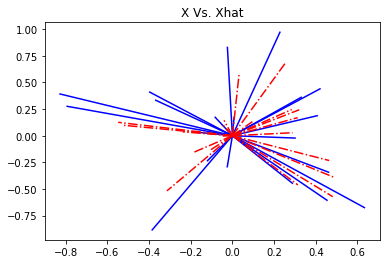

In [48]:
theta=numpy.zeros(20)
r=numpy.zeros(20)
for i in range(20):
    theta[i] = numpy.random.uniform(0,2*numpy.pi)
    r[i]=numpy.random.uniform(0,1)

X= numpy.array([r*numpy.cos(theta), r*numpy.sin(theta)])
for i in range(20):
    plt.plot([0,X[0,i]],[0,X[1,i]],'b',label= "X Vector")

A=numpy.zeros([100,20])

xIntercept=numpy.array([random.uniform(-1,1) for i in range(100)])
frMax=numpy.array([random.uniform(100,200) for i in range(100)])

for i in range(100):
    tau_rc=0.02
    tau_ref=0.002
    gain=(1/(1-xIntercept[i]))*(1/(1-numpy.e**((frMax[i]*tau_ref-1)/(frMax[i]*tau_rc))))
    bias=-xIntercept[i]*gain
    A[i]=LIF(numpy.dot(X.T,[e[0,i],e[1,i]]),gain=gain,bias=bias)

A_noisy=A+numpy.random.normal(scale=0.2*numpy.max(A),size=A.shape)  
Xhat=numpy.dot(A_noisy.T,d_noisy.T)

for i in range(20):
    plt.plot([0,Xhat[i,0]],[0,Xhat[i,1]],'r-.', label="Xhat Vector")
  
RMSE=numpy.sqrt((numpy.linalg.norm(Xhat.T-X)**2)/20) 
print('RMSE: ' ,RMSE)

plt.title("X Vs. Xhat")

<ol style="list-style:lower-alpha outside none;" start="4">
<li> [2 marks] Repeat part c) but use the *encoders* as decoders.  This is what Georgopoulos used in his original approach to decoding information from populations of neurons.  Plot the decoded values this way and compute the RMSE.  In addition, recompute the RMSE in both cases you've done, but ignoring the magnitude of the decoded vector.  What are the relative merits of these two approaches to decoding?
<ul><li>To ignore the magnitude of the vectors, normalize the length of the decoded vectors before computing the RMSE.</li>
</ul>
</li>
</ol>

RMSE:  1933.953885473676


Text(0.5, 1.0, 'Xhat when considering encoders as decoders ')

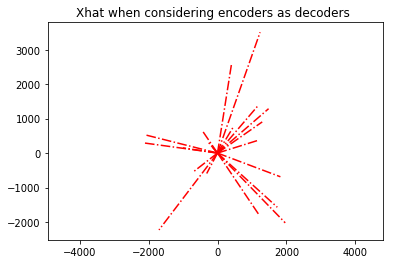

In [49]:
Xhat_Geo=numpy.dot(A_noisy.T,e.T)

for i in range(20):
    plt.plot([0,Xhat_Geo[i,0]],[0,Xhat_Geo[i,1]],'r-.')
    plt.axis('equal') 

RMSE1=numpy.sqrt((numpy.linalg.norm(Xhat_Geo.T-X)**2)/20) 
print('RMSE: ' ,RMSE1)    

plt.title("Xhat when considering encoders as decoders ")

RMSE:  1873.909065922094


Text(0.5, 1.0, 'Xhat when normalizin our NEF decoders ')

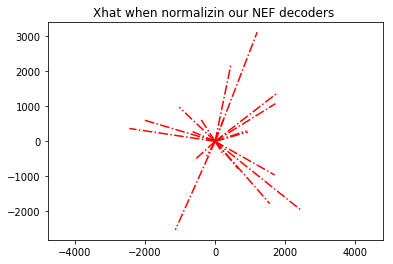

In [50]:
for i in range(100):
    d_noisy.T[i]=d_noisy.T[i]/numpy.linalg.norm(d_noisy.T[i])

A_noisy=A+numpy.random.normal(scale=0.2*numpy.max(A),size=A.shape)  
Xhat=numpy.dot(A_noisy.T,d_noisy.T)

for i in range(20):
    plt.plot([0,Xhat[i,0]],[0,Xhat[i,1]],'r-.')
    plt.axis('equal') 

RMSE=numpy.sqrt((numpy.linalg.norm(Xhat.T-X)**2)/20) 
print('RMSE: ' ,RMSE)

plt.title("Xhat when normalizin our NEF decoders ")

>When (1) the unit vector ecoders are considered as decoders or (2) the normalized decoders are used to estimate the original Xs ($\hat{X}s$) ; 
i.e., the magnitudes of original Xs have not been taken into account in our calculation the results of estimation are not acceptable and refering to ERMS the decoding fails to estimate Xs.    